In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
from scipy import signal as sig
import pandas as pd
import math
from scipy.signal import find_peaks_cwt
import peakutils

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [203]:
patients_list = ["1", "675", "676", "678", "680", "684", "686"]
ppg_3_chan = []
measures = []
hrw = 0.75
fs = 125

file_address = "ppg-data/Training_Data/DATA_01_TYPE01.mat"
real_data_file_addresses = ["ppg-data/" + pat_num + "/Device_Volts.xls" for pat_num in patients_list]

# Real data

files = [pd.read_excel(file_name, header=3, skiprows=2) for file_name in real_data_file_addresses]

def wave_splitter(seq):
    return seq[::3], seq[1::3], seq[2::3]

def ppg_segment(ppg, num):
    return ppg[0 + num * 1000: 1000 + num * 1000]

for file in files:
    ppg1, ppg2, ppg3 = wave_splitter(file['Ch : IR AMBIENT'])
    amb1, amb2, amb3 = wave_splitter(file['Ch : RED'])
    
    ppg1 = list(ppg1[:3000])
    ppg2 = list(ppg2[:3000])
    ppg3 = list(ppg3[:3000])
    amb1 = list(amb1[:3000])
    amb2 = list(amb2[:3000])
    amb3 = list(amb3[:3000])
    
    ppg_3_chan_single = pd.DataFrame({"PPG1": ppg1[1250:2500], "PPG2": ppg2[1250:2500],"PPG3": ppg3[1250:2500], "AMB1": amb1[1250:2500], "AMB2": amb2[1250:2500], "AMB3": amb3[1250:2500]})
    ppg_3_chan.append(ppg_3_chan_single)

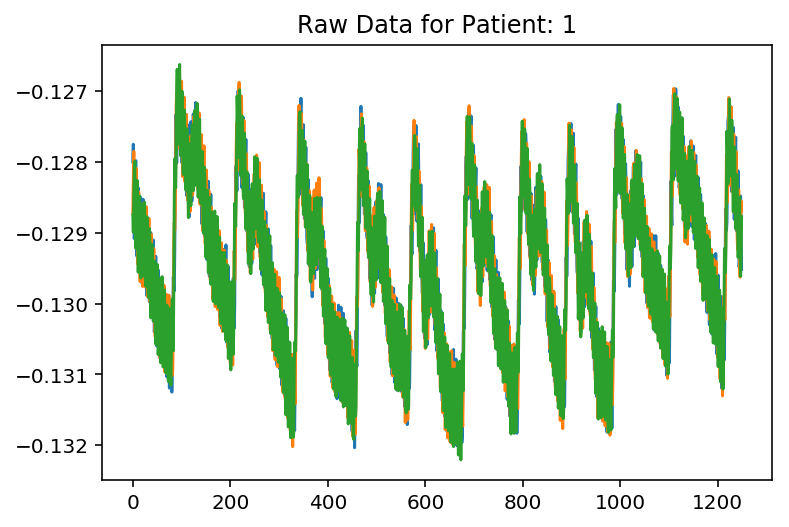

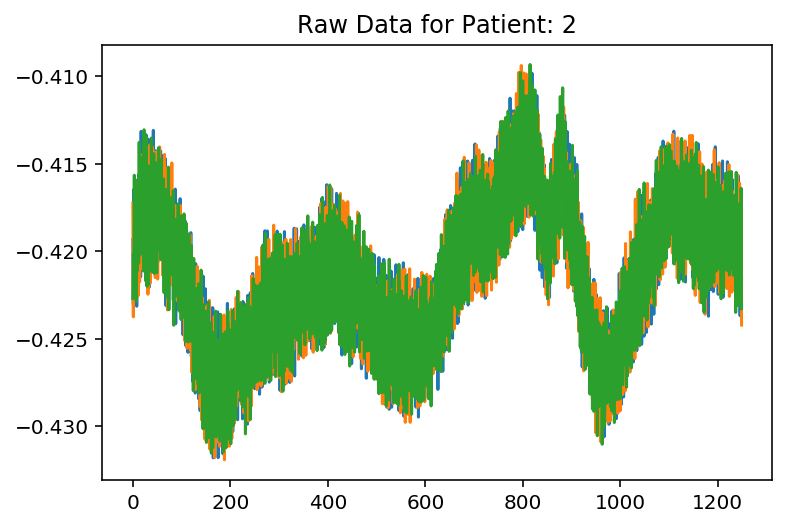

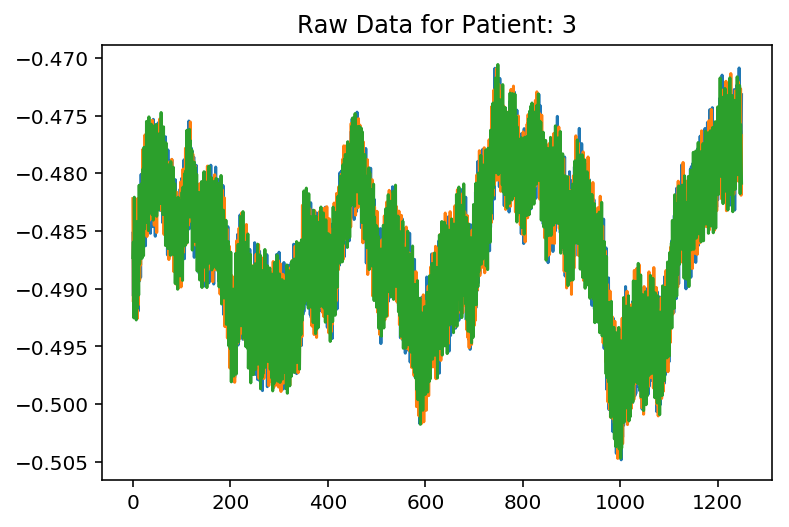

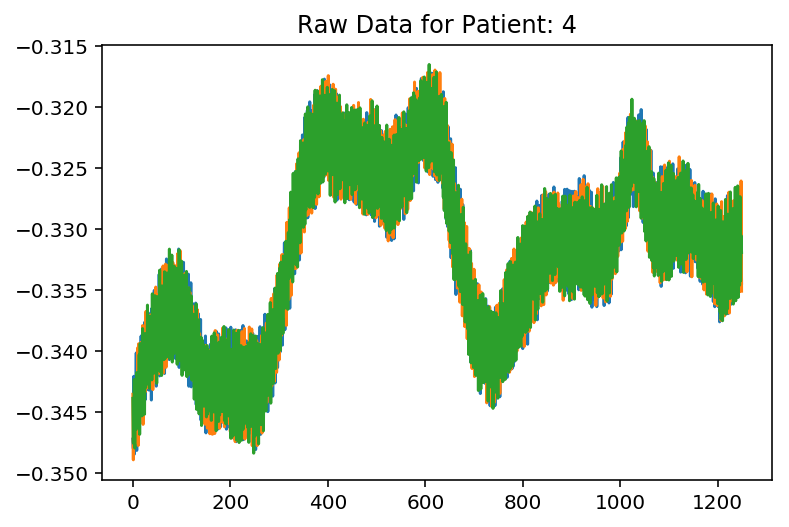

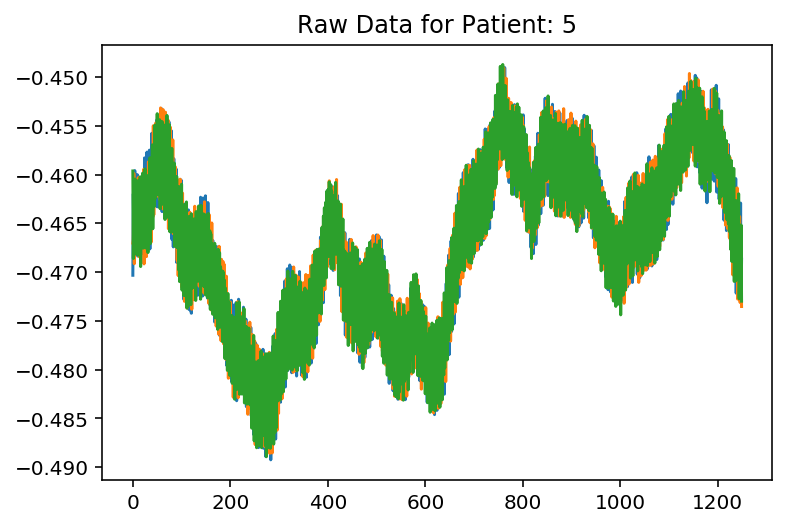

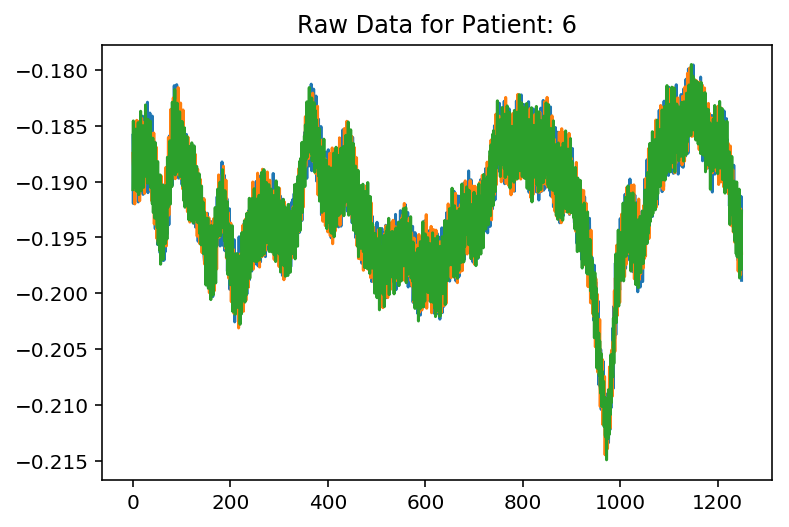

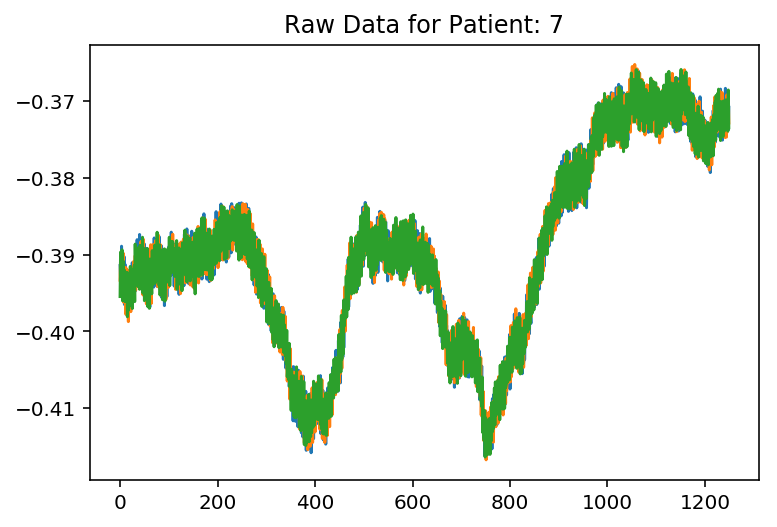

In [204]:
for index, dataframe in enumerate(ppg_3_chan):
    plt.title("Raw Data for Patient: " + str(index+1))
    plt.plot(dataframe["PPG1"])
    plt.plot(dataframe["PPG2"])
    plt.plot(dataframe["PPG3"])
    plt.show()

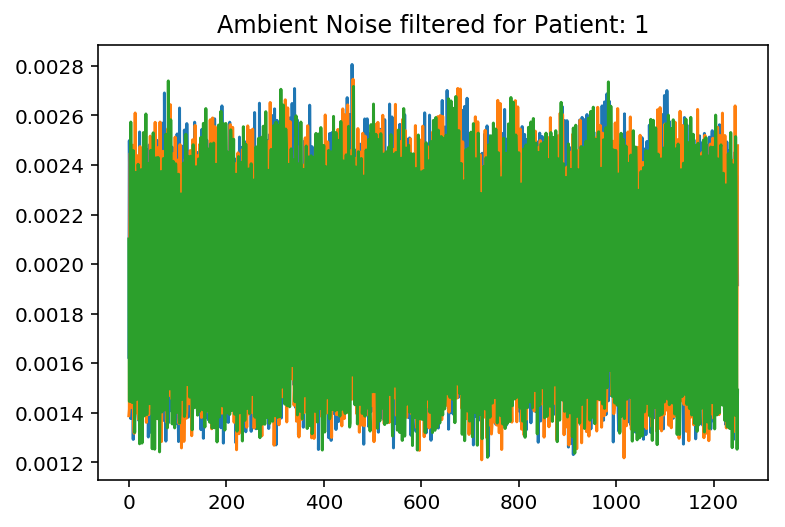

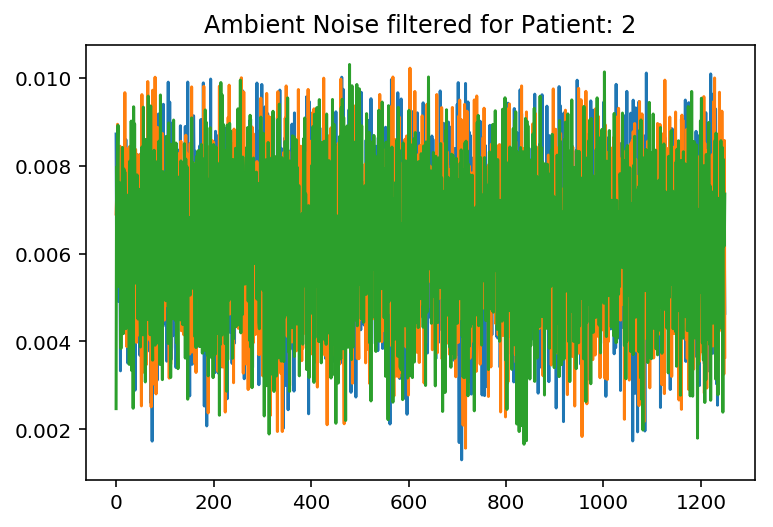

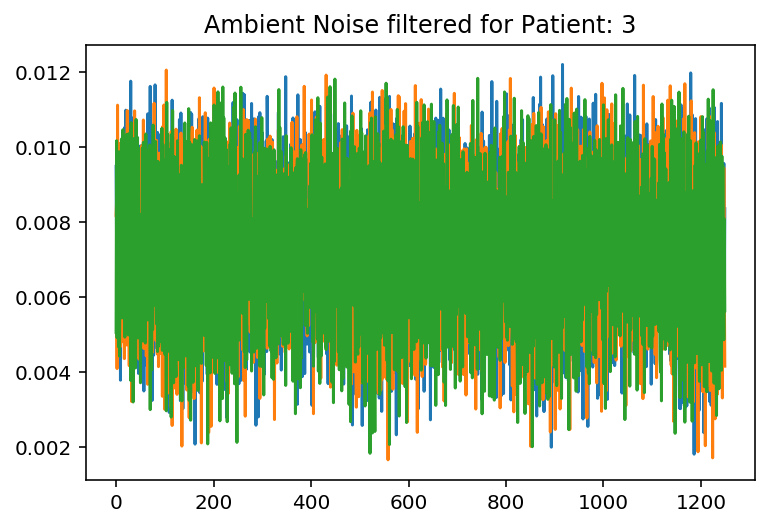

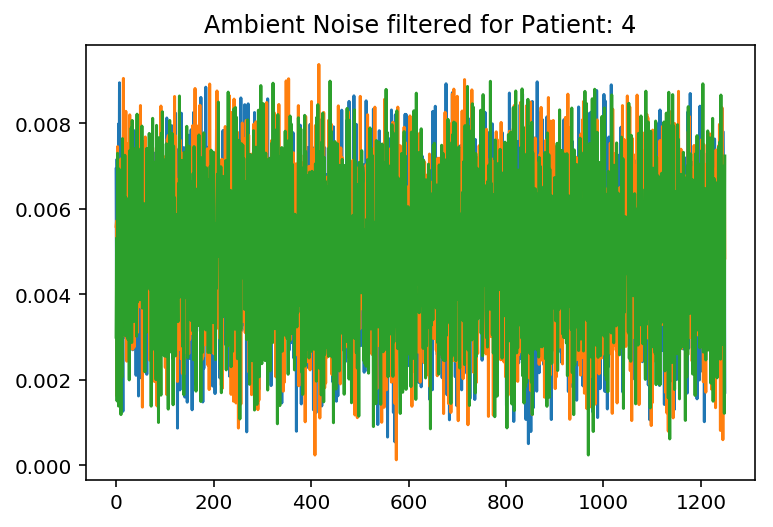

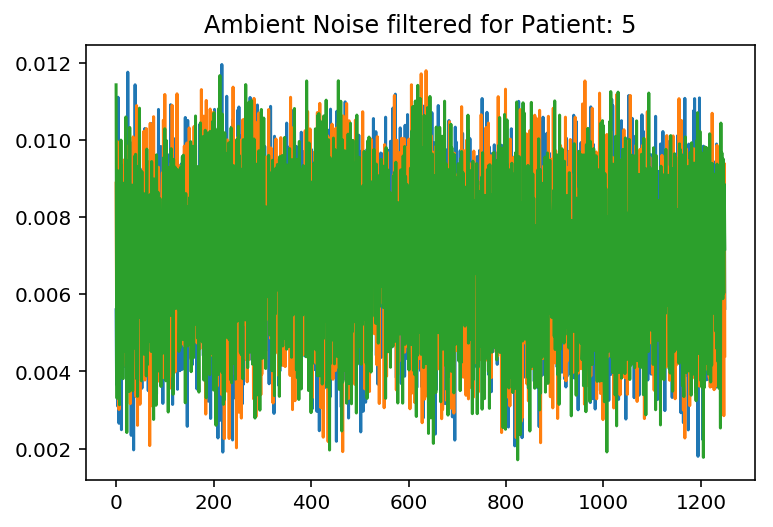

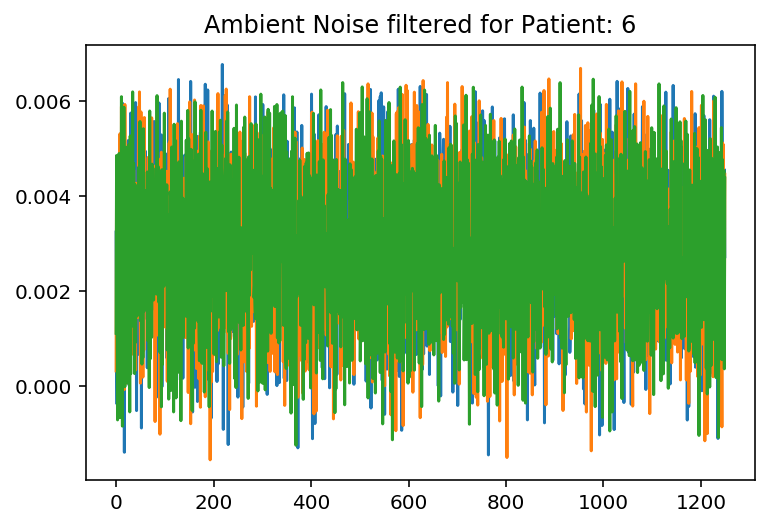

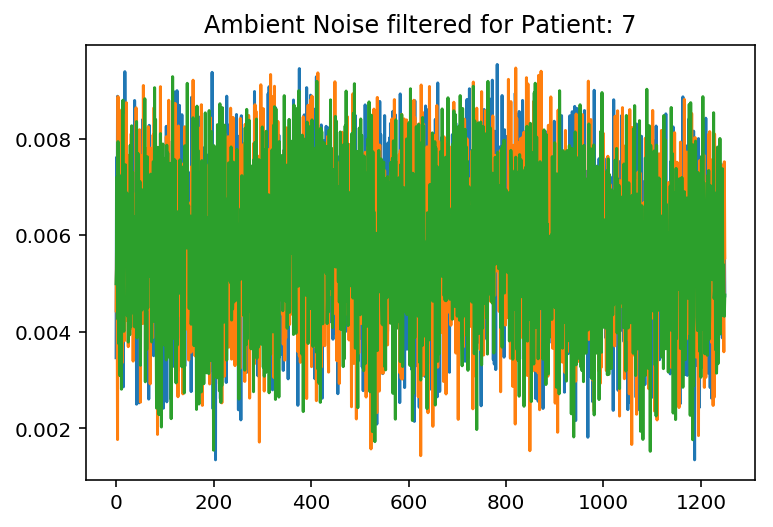

In [205]:
for index, dataframe in enumerate(ppg_3_chan):
    plt.title("Ambient Noise filtered for Patient: " + str(index+1))
    dataframe["PPG_PURE1"] = dataframe["PPG1"] - dataframe["AMB1"]
    dataframe["PPG_PURE2"] = dataframe["PPG2"] - dataframe["AMB2"]
    dataframe["PPG_PURE3"] = dataframe["PPG3"] - dataframe["AMB3"]
    
    plt.plot(dataframe["PPG_PURE1"])
    plt.plot(dataframe["PPG_PURE2"])
    plt.plot(dataframe["PPG_PURE3"])
    plt.show()

/Users/saad/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=93,center=False).mean()
  from ipykernel import kernelapp as app
/Users/saad/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=93,center=False).mean()
  app.launch_new_instance()
/Users/saad/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=93,center=False).mean()


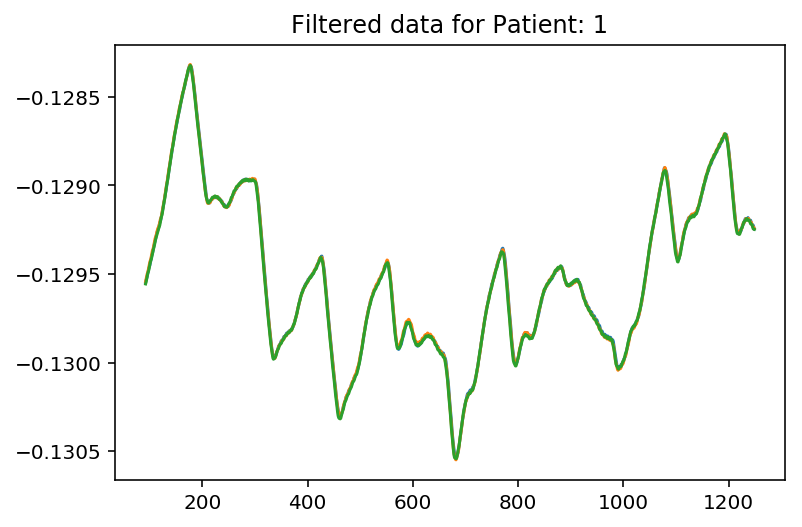

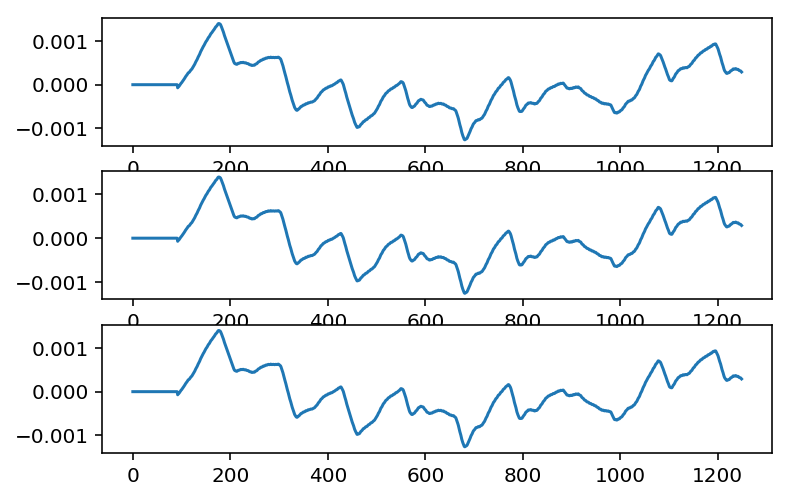

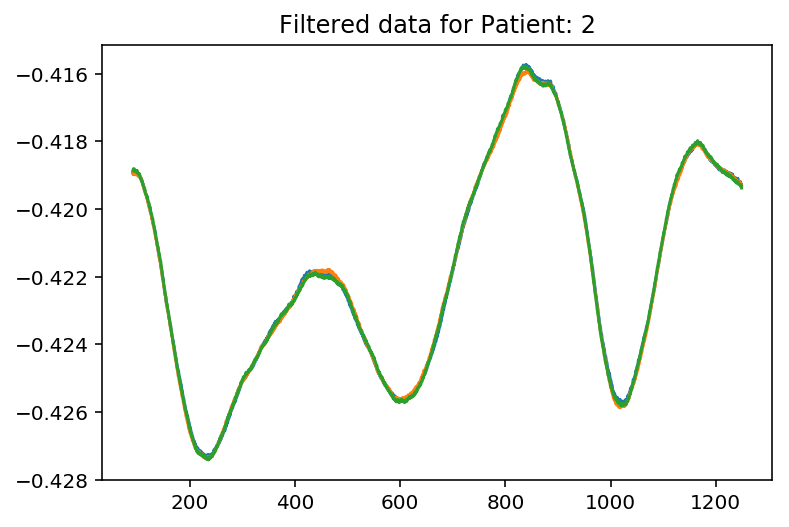

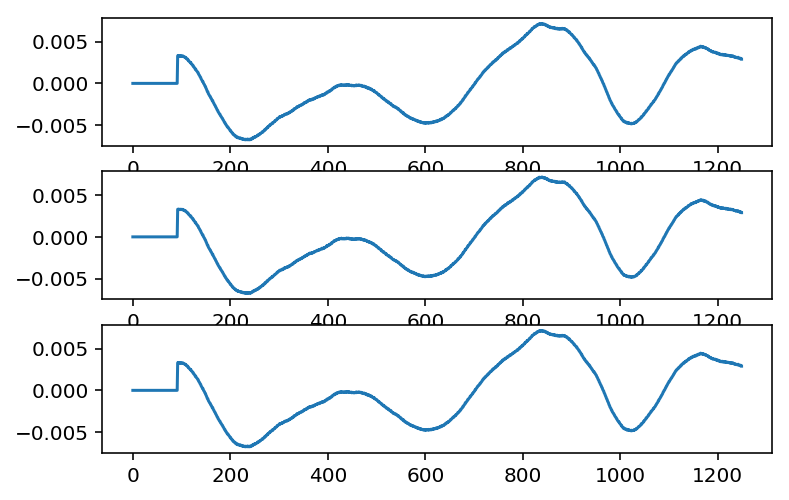

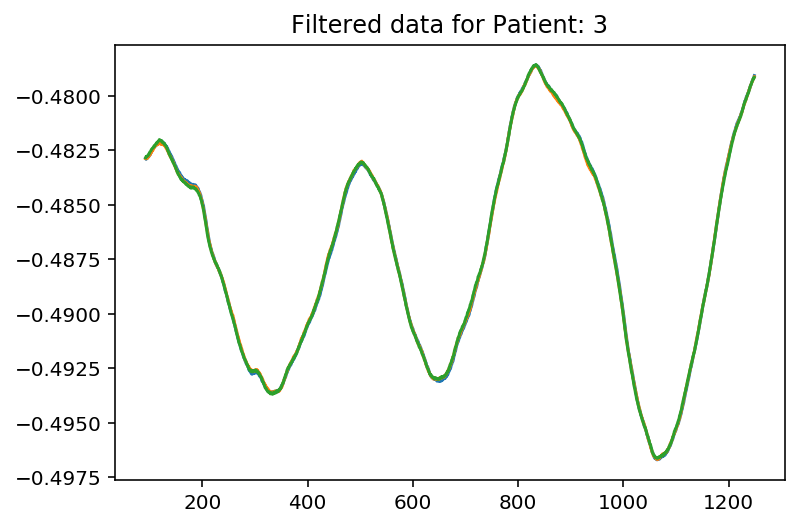

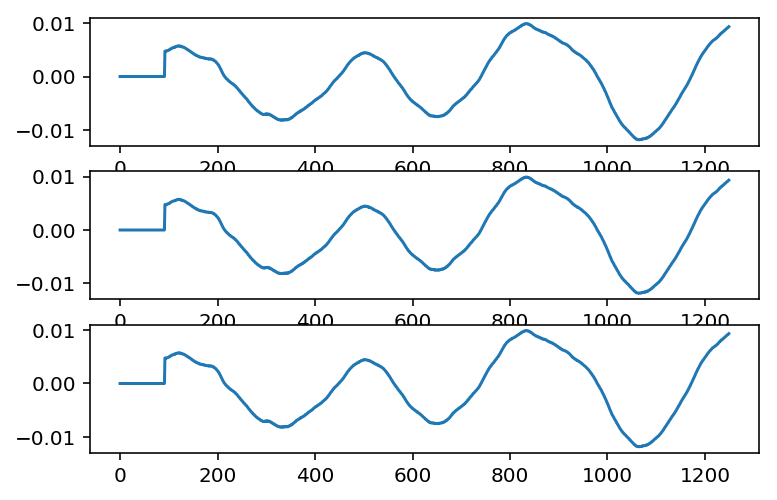

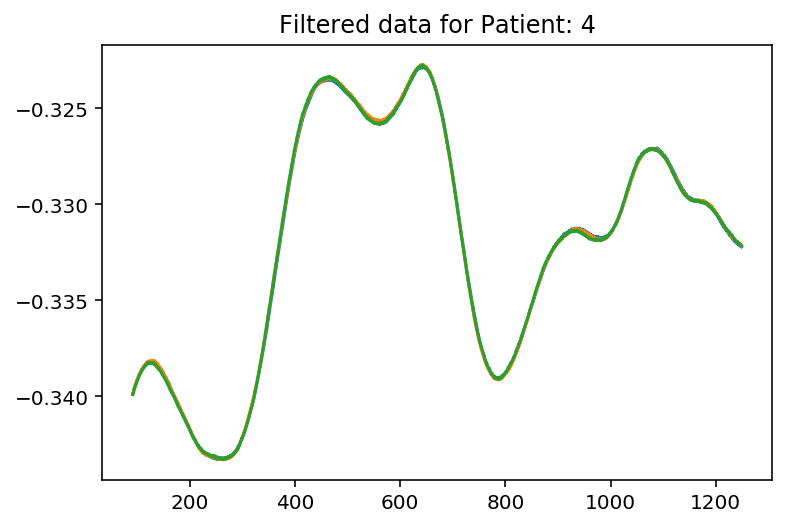

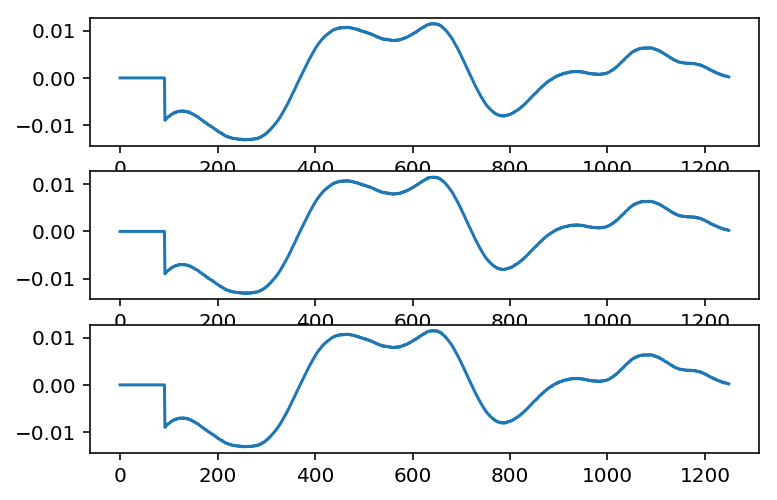

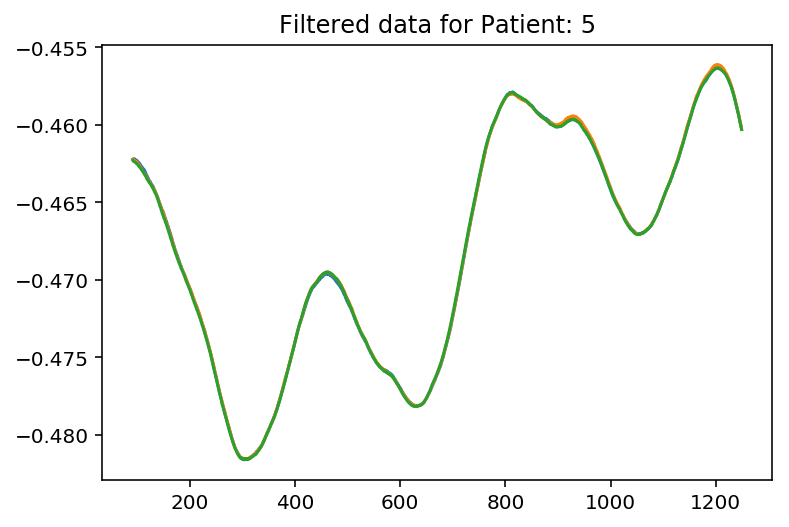

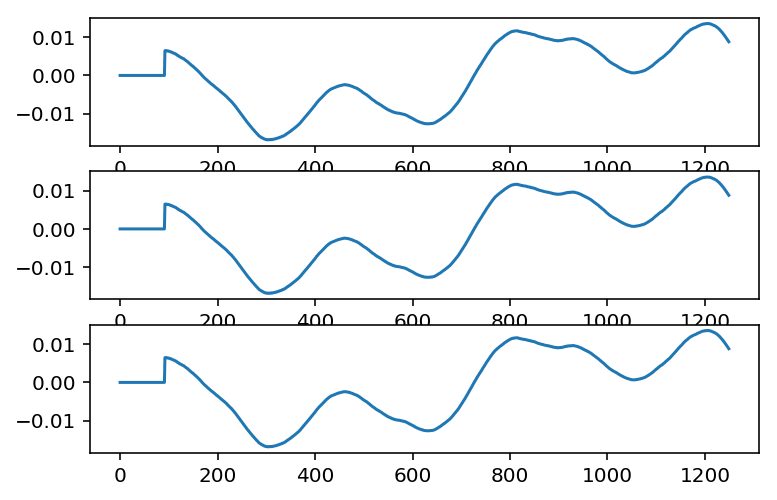

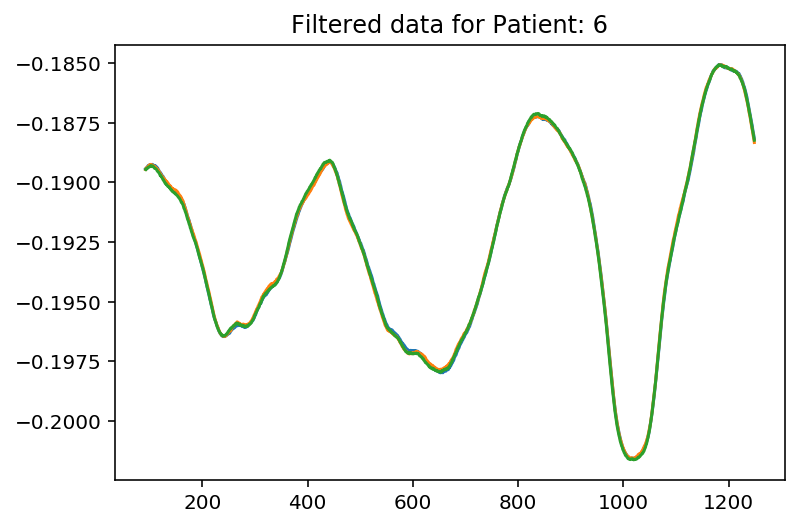

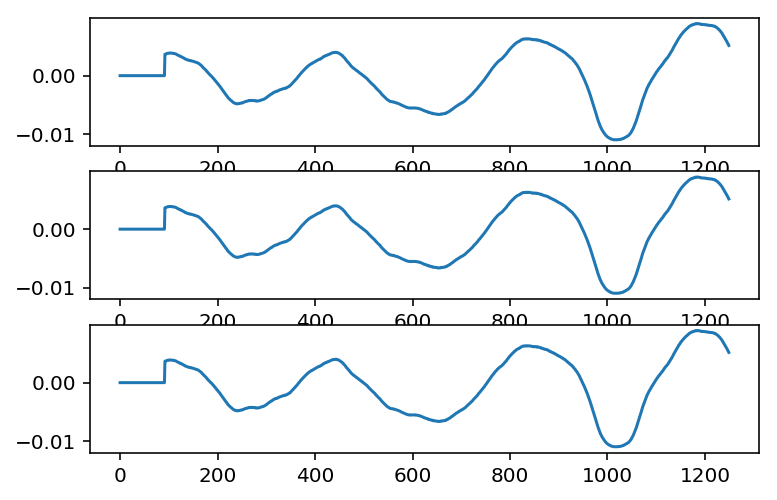

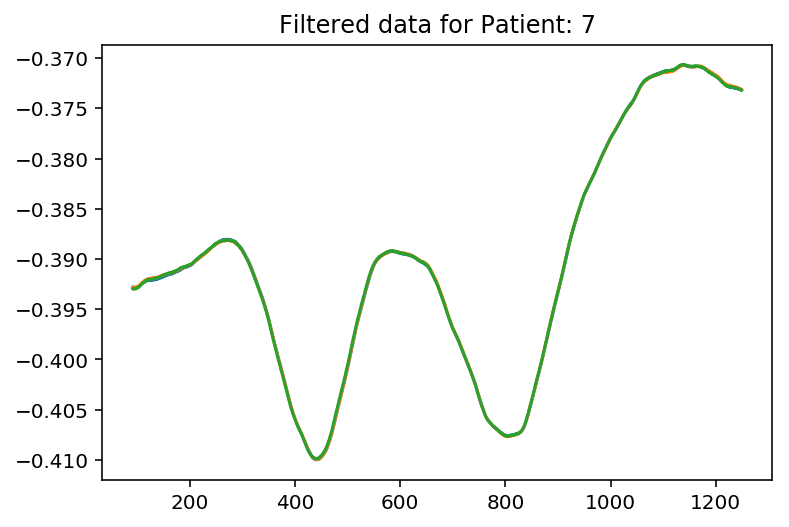

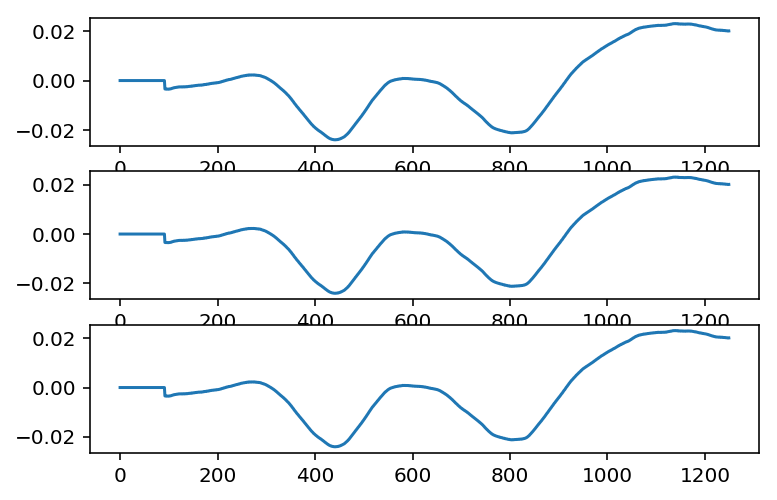

In [206]:
def rolmean(dataset, hrw, fs):
    mov_avg1 = pd.rolling_mean(dataset["PPG1"], window=(int(hrw*fs)))
    mov_avg2 = pd.rolling_mean(dataset["PPG2"], window=(int(hrw*fs)))
    mov_avg3 = pd.rolling_mean(dataset["PPG3"], window=(int(hrw*fs)))
    
    plt.plot(mov_avg1)
    plt.plot(mov_avg2)
    plt.plot(mov_avg3)
    plt.show()
    
    avg_hr1 = (np.mean(dataset["PPG1"])) 
    avg_hr2 = (np.mean(dataset["PPG2"])) 
    avg_hr3 = (np.mean(dataset["PPG3"]))

    mov_avg1 = [0 if math.isnan(x) else x - avg_hr1 for x in mov_avg1]
    mov_avg2 = [0 if math.isnan(x) else x - avg_hr2 for x in mov_avg2]
    mov_avg3 = [0 if math.isnan(x) else x - avg_hr2 for x in mov_avg3]
    mov_avg1 = [x*1.2 for x in mov_avg1]
    mov_avg2 = [x*1.2 for x in mov_avg2]
    mov_avg3 = [x*1.2 for x in mov_avg3]
    dataset['ROLL_MEAN1'] = mov_avg1
    dataset['ROLL_MEAN2'] = mov_avg2
    dataset['ROLL_MEAN3'] = mov_avg3
    
for index, dataframe in enumerate(ppg_3_chan):
    plt.title("Filtered data for Patient: " + str(index+1))
    rolmean(dataframe, hrw, fs)
    plt.subplot(3, 1, 1)
    plt.plot(dataframe["ROLL_MEAN1"])
    plt.subplot(3, 1, 2)
    plt.plot(dataframe["ROLL_MEAN1"])
    plt.subplot(3, 1, 3)
    plt.plot(dataframe["ROLL_MEAN1"])
    plt.show()

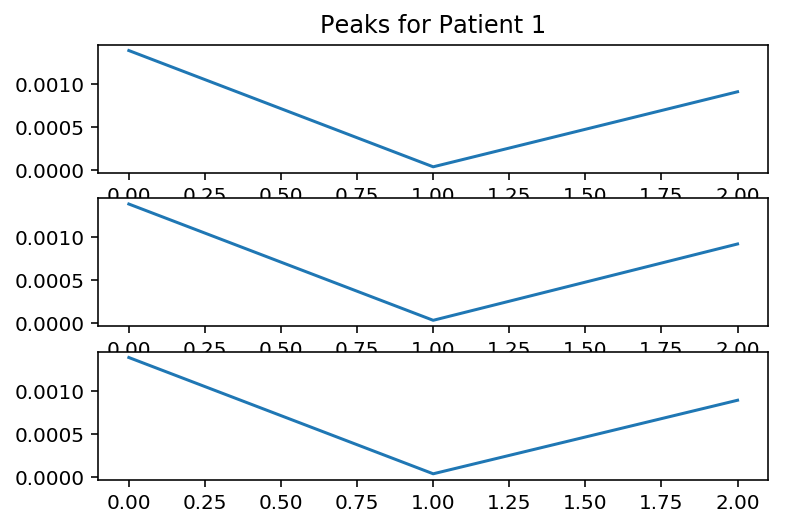

Heart Rate for respective peaks:
[54.0, 54.0, 54.0]



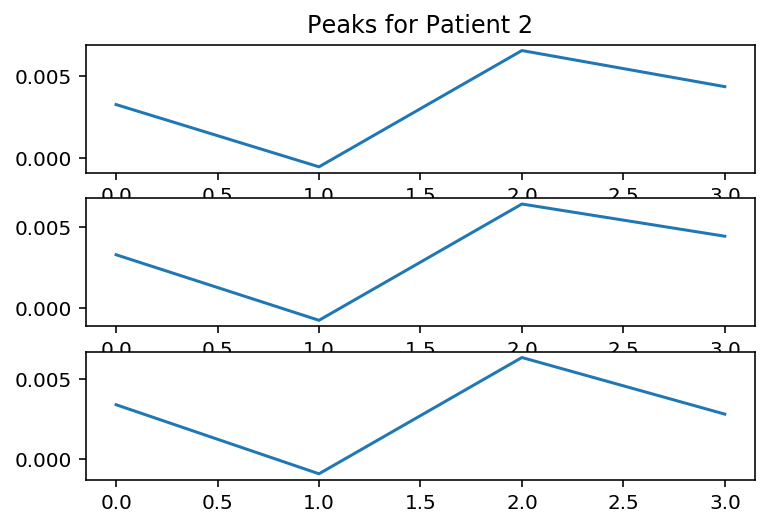

Heart Rate for respective peaks:
[72.0, 72.0, 72.0]



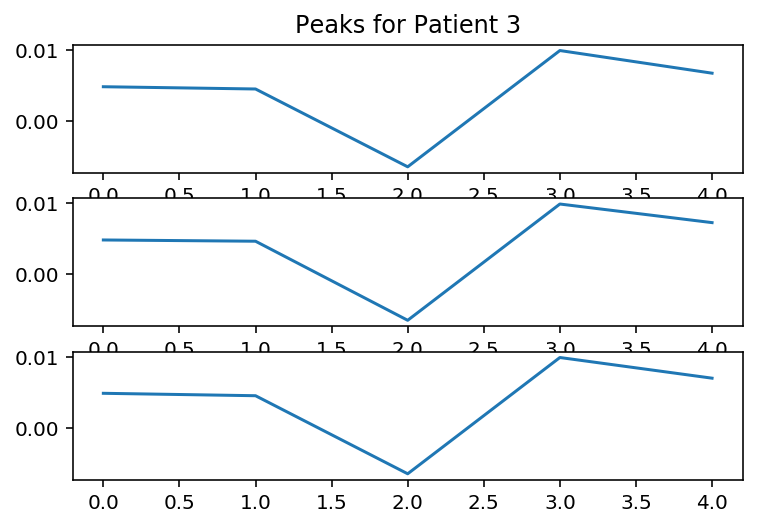

Heart Rate for respective peaks:
[90.0, 90.0, 90.0]



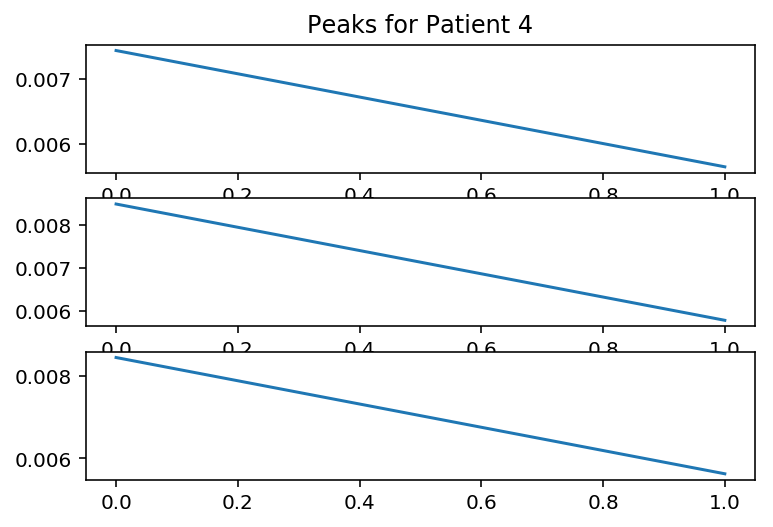

Heart Rate for respective peaks:
[36.0, 36.0, 36.0]



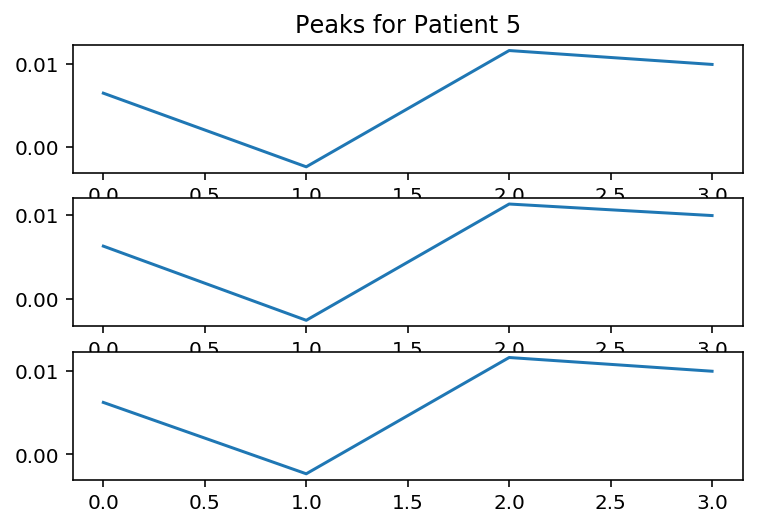

Heart Rate for respective peaks:
[72.0, 72.0, 72.0]



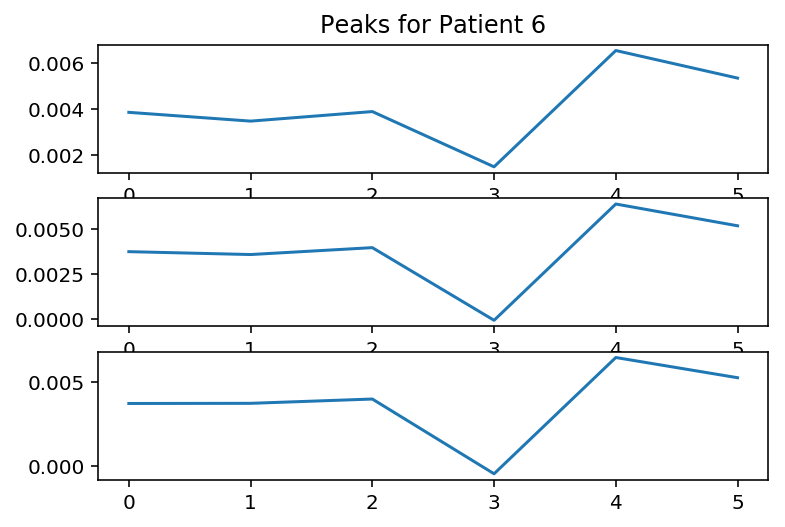

Heart Rate for respective peaks:
[108.0, 108.0, 108.0]



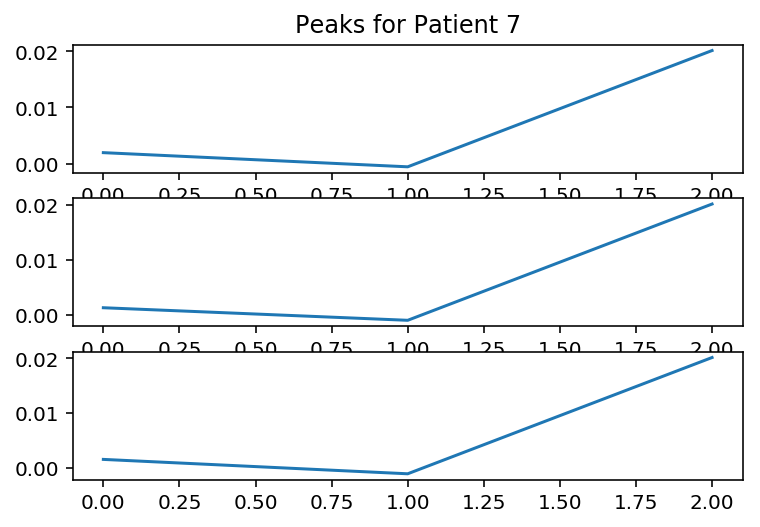

Heart Rate for respective peaks:
[54.0, 54.0, 54.0]



In [207]:
def detect_peaks(dataset):
    measure = pd.DataFrame()
    
    measure["PEAKS1"] = find_peaks_cwt(dataset["ROLL_MEAN1"], np.arange(1, 550))
    measure["PEAKS2"] = find_peaks_cwt(dataset["ROLL_MEAN2"], np.arange(1, 550))
    measure["PEAKS3"] = find_peaks_cwt(dataset["ROLL_MEAN3"], np.arange(1, 550))
    
    #indexes = peakutils.indexes(cb, thres=0.02/max(cb), min_dist=100)
    
    measure["YPEAKS1"] = [dataset["ROLL_MEAN1"][x] for x in measure["PEAKS1"]]
    measure["YPEAKS2"] = [dataset["ROLL_MEAN2"][x] for x in measure["PEAKS2"]]
    measure["YPEAKS3"] = [dataset["ROLL_MEAN3"][x] for x in measure["PEAKS3"]]
    
    measures.append(measure)
    
    
def calc_hr(dataset, measure_set):
    return [180 * len(measure_set["PEAKS1"]) / (len(dataset['PPG1']) / 125.0), 180 * len(measure_set["PEAKS2"]) / (len(dataset['PPG2']) / 125.0), 180 * len(measure_set["PEAKS3"]) / (len(dataset['PPG3']) / 125.0)]
 
    
measures = []

for index, dataframe in enumerate(ppg_3_chan):
    
    detect_peaks(dataframe)
    plt.subplot(3, 1, 1)
    plt.title("Peaks for Patient " + str(index+1))
    plt.plot(measures[index]["YPEAKS1"])
    plt.subplot(3, 1, 2)
    plt.plot(measures[index]["YPEAKS2"])
    plt.subplot(3, 1, 3)
    plt.plot(measures[index]["YPEAKS3"])
    plt.show()
    
    print("Heart Rate for respective peaks:")
    print(calc_hr(dataframe, measures[index]))
    print()



In [208]:
def OPDensCalc(windows, del_time, filename) :
    stable_dur=stabledur #if we are reading over the stable span of 30 s
    heart_rate=heartrate
    rows_per_sec=125
    rows_per_beat=(60/heart_rate)*rows_per_sec
    window_size=rows_per_beat #one beat
    #window_size=2
    offset=0
    window_boundary=rows_per_sec*stable_dur  #span of windows
    #window_boundary=5
    op_densdf=p.DataFrame()
    op_densdf=op_densdf.astype(float)
    for offset in np.arange(offset,window_boundary-window_size,window_size):
        sio.loadmat
        window_size+=offset
        results=p.read_csv(filename, skiprows=offset, nrows=window_size,usecols=[2,3,4,5],header=None,names=[ 'w1', 'w2','w3','noise'])  #returns panda dataframe [no.row *no of colums] # Prints "[[ 0.  0.]  [ 0.  0.]]"
        
        for column in results:
            #maxima is taken to be t+1, minima to be t 
            idmax=results[column].idxmax()   #id of row of maxima
            I_max=results.iloc[idmax][column]  #intensity of maxima
            noise_max=results.iloc[idmax]['noise'] #corresponding noise
            I_max=I_max-noise_max
            idmin=results[column].idxmin()
            I_min=results.iloc[idmin][column]
            noise_min=results.iloc[idmin]['noise']
            I_min=I_min-noise_min
            delta_I=I_max-I_min
            Optical_dens=math.log10(1+(delta_I/I_max))
            print (Optical_dens)
            data_elem= p.DataFrame({column:[Optical_dens ]},dtype=float) #another dataframe of calculated optical densities for each window in the stable duration corres each wavelength
            #print (data_elem)
            op_densdf=op_densdf.append(data_elem)
            
    del op_densdf['noise'] #delete noise column       
    #print(op_densdf.ix[:, op_densdf.columns != 'noise'])
    print(op_densdf)
    op_dens_means=op_densdf.mean(axis=0)
    print(op_dens_means)  

In [202]:
def sigmoid(x):
    return 1/(1+np.exp(-x)) 

def dsigmoid(y):
    return y * (1.0 - y)

def calc_meansqerror(real_val,val):
    # The error for each neuron is calculated by the Mean Square Error method:
    error = 0.5*np.square(real_val - val)
    return error

def pd_error_wrt_output(real_val,val):
    return -(real_val-val)  

def BGLCalcANN(opticald1,opticald2,opticald3,realbgl=0):
    accurate_bgl=realbgl
    #by default it is 0

    opdens1 = opticald1
    opdens2 = opticald2
    opdens3 = opticald3
    
    #weights
    w1 = np.array([[-.7200,-2.1339,-2.6487,-1.6305,-2.4648,-2.3817,0.9911,-2.4450,1.0575,-1.2526]])  
    w2 = np.array([-1.8341,1.6408,-1.0157,-2.2957,0.3102,-1.8592,2.0438,0.3549,2.9467,2.7371])
    w3 = np.array([2.0734,1.4818,1.0253,1.0672,-1.6974,0.2694,1.8781,-2.4238,0.0682,-1.0634])
    b = np.array([3.2548,2.1903,1.6855,0.9870,0.2725,-0.4620,1.1163,-1.1534,2.2939,-2.6764])
    epochs=600000
    learningrate=0.01
    if accurate_bgl==0:
        # Feed forward through layers 1, and 2
        x = (w1*opdens1 +w2*opdens2 +w3*opdens3) + b
        #print(sigmoid(x))
        bgl=sigmoid(x)
        #print(bgl)
        return np.array([bgl.mean()])
    else:  #if bgl given , back propagate
    
        for epoch in range(0, epochs):
             # Feed forward through layers 1, and 2
            x = (w1*opdens1 +w2*opdens2 +w3*opdens3) + b
            #print(sigmoid(x))
            bgl=sigmoid(x)
            #print(bgl)
            
            # how much did we miss the target value?

            pd_error_wrt_total_netinput=pd_error_wrt_output(accurate_bgl,bgl.mean())*dsigmoid(bgl.mean())
        
       
            #update neuron weights
            
            
            # ∂Eⱼ/∂wᵢⱼ = ∂E/∂zⱼ * ∂zⱼ/∂wᵢⱼ
            
            #w1
            pd_error_wrt_weight1=pd_error_wrt_total_netinput *opdens1
            w1-=learningrate*pd_error_wrt_weight1
        
        
            #w2
         
            pd_error_wrt_weight2=pd_error_wrt_total_netinput *opdens2
            w2-=learningrate*pd_error_wrt_weight2
        
        
            #w3
            pd_error_wrt_weight3=pd_error_wrt_total_netinput *opdens3
            w3-=learningrate*pd_error_wrt_weight3
       
        
            if (epoch% 10000) == 0:
                print( "E-rror:" + str(np.mean(np.abs(calc_meansqerror(accurate_bgl,bgl.mean())))))

        return np.array([bgl.mean(),np.mean(np.abs(calc_meansqerror(accurate_bgl,bgl.mean())))])
    
    
